In [10]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import pandas as pd
import seaborn as sns
from flask import Flask, request
import matplotlib.pyplot as plt

In [2]:
con = psycopg2.connect(host='localhost', database='imobiliaria',user='postgres', password='67676968')
cur = con.cursor()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


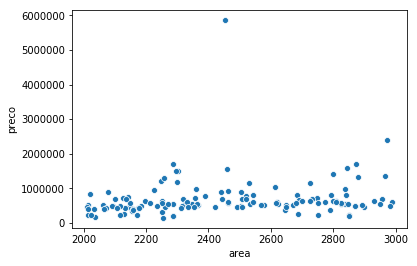

127.0.0.1 - - [10/Feb/2020 11:00:49] "GET /area/2000/3000 HTTP/1.1" 200 -


In [13]:
# Criar endpoint de get, que deve selecionar os dados dentro de um intervalo de area, 
# plotar o gráfico de dispersão em que o eixo x é a área e o eixo y o preco e retornar o json com esses dados;
app = Flask(__name__)

@app.route("/area/<a>/<b>", methods =['GET'])
def area(a,b):
    query = "SELECT area, preco FROM info_casas WHERE  area > {a}  AND area < {b}".format(a=a,b=b)
    try:
        df = pd.read_sql(query,con)
        sns.scatterplot(x=df.area, y=df.preco)
        plt.show()
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela casas.", 500
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


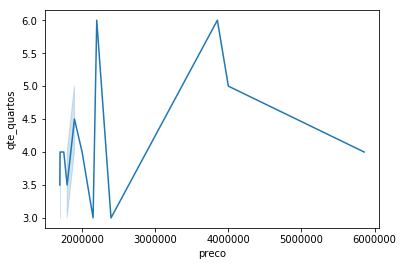

127.0.0.1 - - [10/Feb/2020 11:49:15] "GET /15 HTTP/1.1" 200 -


In [28]:
#Criar endpoint de get, que deve selecionar os 15 dados com maior preco em ordem decrescente, 
#plotar o gráfico de linha em que o eixo x é o preco e o eixo y a qte_quartos e retornar o json com esses dados;


app = Flask(__name__)

@app.route("/15", methods =['GET'])
def top():
    query = "SELECT qte_quartos, preco FROM info_casas ORDER BY preco DESC limit 15"
    try:
        df = pd.read_sql(query,con)
        sns.lineplot(x=df.preco, y=df.qte_quartos)
        plt.show()
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela casas.", 500
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Feb/2020 22:27:37] "GET /ban/2/30 HTTP/1.1" 200 -


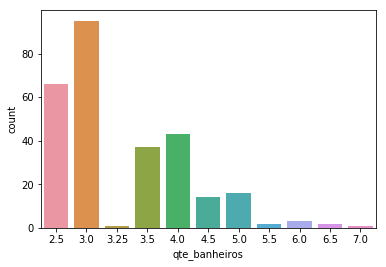

In [31]:
#Criar endpoint de get, que deve selecionar todos os dados com determinada quantidade de qte_banheiros,
#plotar o gráfico de barra em que o eixo x é o qte_banheiros e o eixo y a qte_quartos e retornar o json com esses dados;

app = Flask(__name__)

@app.route("/ban/<a>/<b>", methods =['GET'])
def ban(a,b):
    query = "SELECT qte_banheiros, qte_quartos FROM info_casas WHERE qte_banheiros > {a}  AND qte_banheiros < {b}".format(a=a,b=b)
    try:
        df = pd.read_sql(query,con)
        sns.countplot(x=df.qte_banheiros, data=df)
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela casas.", 500
app.run()

In [21]:
#Criar endpoint de put, que atualize os dados pelo cep;
app = Flask(__name__)

@app.route("/atualizacao", methods =['PUT'])
def atualizacao():
    querystring_args = request.args.to_dict()
    post_args = request.json
    try:
        sql ="UPDATE info_casas SET qte_quartos = {}, qte_banheiros = {}, area={}, preco={} WHERE cep = {}".format(post_args["qte_quartos"] ,post_args["qte_banheiros"], post_args["area"], post_args["preco"], post_args["cep"])
        cur.execute(sql)
        con.commit()
        return "UPDATE com sucesso", 200
    except:
        return "Não foi possível fazer UPDATE na tabela casas.", 500
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 11:36:59] "PUT /atualizacao HTTP/1.1" 200 -


{}
{'qte_quartos': 1, 'qte_banheiros': 1, 'area': 1, 'preco': 1, 'cep': 85255}


In [25]:
query ="SELECT * FROM info_casas WHERE cep = 85255"
df = pd.read_sql(query,con)
df.head(1)

,qte_quartos,qte_banheiros,area,cep,preco
0,1.0,1.0,1,85255,1.0


In [26]:
# Criar endpoint de delete, que delete os dados pelo cep;

app = Flask(__name__)

@app.route("/delete", methods =['DELETE'])
def atualizacao():
    querystring_args = request.args.to_dict()
    post_args = request.json
    try:
        sql ="DELETE FROM info_casas  WHERE cep = {}".format(post_args["cep"])
        cur.execute(sql)
        con.commit()
        return "Delete com sucesso", 200
    except:
        return "Não foi possível fazer o DELETE na tabela casas.", 500
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 11:47:37] "DELETE /deletE HTTP/1.1" 404 -
127.0.0.1 - - [10/Feb/2020 11:47:48] "DELETE /delete HTTP/1.1" 200 -


{}
{'cep': 85255}


In [27]:
query ="SELECT * FROM info_casas WHERE cep = 85255"
df = pd.read_sql(query,con)
df.head()

,qte_quartos,qte_banheiros,area,cep,preco
